In [3]:
# 请在安装有 Quantstats 的环境下运行
%matplotlib inline
import quantstats as qs
import numpy as np
import datetime as dt
import pandas as pd

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# Create random return data with a date index.
np.random.seed(42)
index = pd.date_range(end=dt.datetime.now(), periods=1000, freq='B')
stock = pd.Series(np.random.normal(0.001, 0.02, len(index)), index=index)

returns = stock.pct_change().dropna()
# show sharpe ratio
qs.stats.sharpe(stock)

np.float64(1.1239729896454935)

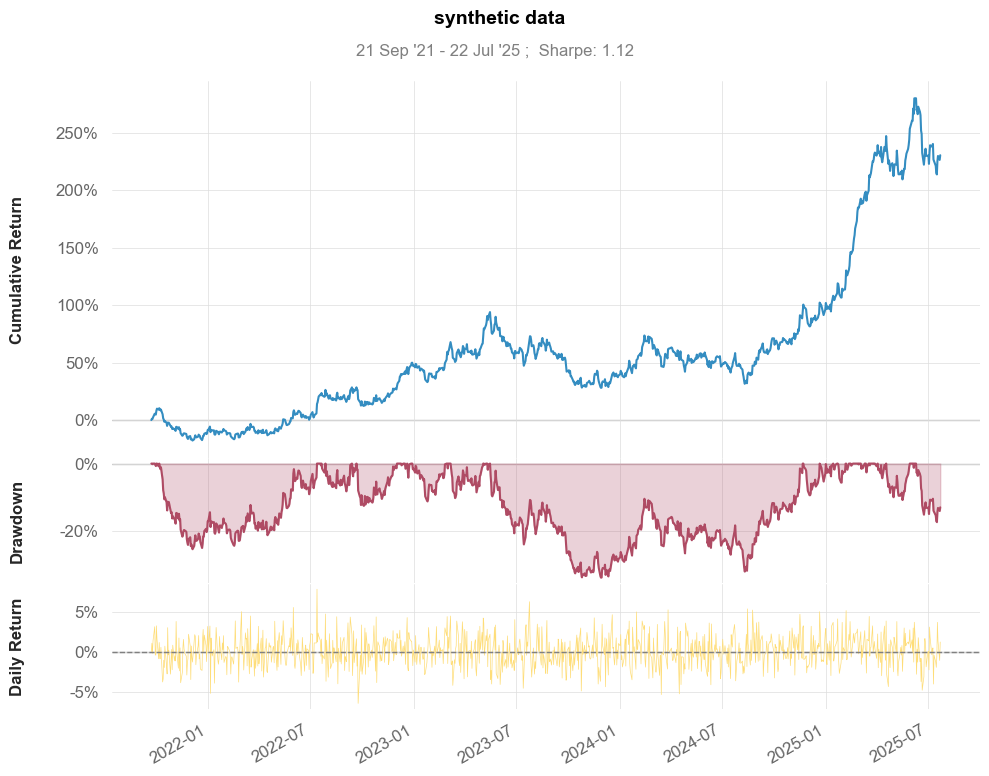

In [4]:
qs.plots.snapshot(stock, title='synthetic data', show=True)

In [5]:
np.random.seed(42)
benchmark = pd.Series(np.random.normal(0.0, 0.02, len(index)), index=index)

qs.reports.full(stock, benchmark, output="/tmp/report.html")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [6]:
from pathlib import Path

def record(dst: str):
    import pickle
    dates = pd.date_range(start='2020-01-01', end='2020-12-31', freq='B')

    np.random.seed(42)
    returns = pd.Series(np.random.normal(0.001, 0.02, len(dates)), index=dates)

    np.random.seed(43)
    benchmark_returns = pd.Series(np.random.normal(0.0005, 0.015, len(dates)), index=dates)

    # the following requires returns only
    unary_ops = ['adjusted_sortino', 'autocorr_penalty', 'avg_loss', 'avg_return', 'avg_win', 'best', 'cagr', 'calmar', 'common_sense_ratio', 'comp', 'compsum', 'conditional_value_at_risk', 'consecutive_losses', 'consecutive_wins', 'cpc_index', 'cvar', 'distribution', 'drawdown_details', 'expected_return', 'expected_shortfall', 'exposure', 'gain_to_pain_ratio', 'geometric_mean', 'ghpr', 'implied_volatility', 'kelly_criterion', 'kurtosis', 'max_drawdown', 'monthly_returns', 'omega', 'outlier_loss_ratio', 'outlier_win_ratio', 'outliers', 'payoff_ratio', 'pct_rank', 'probabilistic_adjusted_sortino_ratio', 'probabilistic_ratio', 'probabilistic_sharpe_ratio', 'probabilistic_sortino_ratio', 'profit_factor', 'profit_ratio', 'rar', 'recovery_factor', 'remove_outliers', 'risk_of_ruin', 'risk_return_ratio', 'rolling_sharpe', 'rolling_sortino', 'rolling_volatility', 'ror', 'serenity_index', 'sharpe', 'skew', 'smart_sharpe', 'smart_sortino', 'sortino', 'tail_ratio', 'to_drawdown_series', 'ulcer_index', 'ulcer_performance_index', 'upi', 'validate_input', 'value_at_risk', 'var', 'volatility', 'win_loss_ratio', 'win_rate', 'worst']

    # the following requires benchmark also
    binary_ops = [
        "compare",
        "greeks",
        "information_ratio",
        "r2",
        "r_squared",
        "treynor_ratio"
    ]

    # need speical handling, or not a stats
    excluded = ["rolling_greeks", "safe_concat"]
    results = {}
    for name in dir(qs.stats):
        if name[0] == '_':
            continue
            
        func = getattr(qs.stats, name)
        if name in unary_ops:
            results[name] = func(returns)
        elif name in binary_ops:
            results[name] = func(returns, benchmark_returns)
        else:
            print("no handled", name)

    data= {
        "returns": returns,
        "benchmark": benchmark_returns,
        "results": results,
        "unary_ops": unary_ops
    }

    with open(dst, "wb") as f:
        pickle.dump(data, f)

file = Path("~/workspace/quantstats-reloaded/tests/assets/quantstats-recorded.pkl").expanduser()

record(file)

no handled rolling_greeks
no handled safe_concat
no handled warn


/Users/aaronyang/miniforge3/envs/old_quantstats/lib/python3.10/site-packages/quantstats/stats.py:1759: RuntimeWarning: Mean of empty slice.
  c_var = returns[returns < var].values.mean()
/Users/aaronyang/miniforge3/envs/old_quantstats/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [7]:
from numpy.typing import NDArray
from pathlib import Path

def replay(recorded_file: Path|str|None = None)->Tuple[dict, NDArray, NDArray]:
    # 读取已录制的测试结果
    if recorded_file is None:
        recorded_file = Path(__file__).parent / "assets/quantstats-recorded.pkl"
    else:
        recorded_file = Path(recorded_file)

    if not recorded_file.exists():
        raise FileNotFoundError(f"{recorded_file}不存在")

    with open(recorded_file, "rb") as f:
        data = pickle.load(f)
        expected = data["results"]
        returns = data["returns"]
        benchmark = data["benchmark"]
        unary_ops = data["unary_ops"]

        return returns, benchmark, expected, unary_ops
    
replay(Path("~/workspace/quantstats-reloaded/tests/assets/quantstats-recorded.pkl").expanduser())

(2020-01-01    0.010934
 2020-01-02   -0.001765
 2020-01-03    0.013954
 2020-01-06    0.031461
 2020-01-07   -0.003683
                 ...   
 2020-12-25   -0.013153
 2020-12-28    0.009876
 2020-12-29    0.016493
 2020-12-30   -0.017539
 2020-12-31   -0.000191
 Freq: B, Length: 262, dtype: float64,
 2020-01-01    0.004361
 2020-01-02   -0.013127
 2020-01-03   -0.005178
 2020-01-06   -0.007524
 2020-01-07    0.013371
                 ...   
 2020-12-25    0.007017
 2020-12-28   -0.007382
 2020-12-29   -0.003612
 2020-12-30   -0.016433
 2020-12-31    0.012849
 Freq: B, Length: 262, dtype: float64,
 {'adjusted_sortino': np.float64(0.948271490059808),
  'autocorr_penalty': np.float64(1.048718326970721),
  'avg_loss': np.float64(-0.015322854107816471),
  'avg_return': np.float64(0.00107584036019726),
  'avg_win': np.float64(0.015586915321101496),
  'best': np.float64(0.07805462981309441),
  'cagr': np.float64(0.17423848947596476),
  'calmar': np.float64(0.6831050095301701),
  'common_sen